In [1]:
# installs

# notebook/colab
! pip install scikit-plot

In [2]:
# imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.tree import DecisionTreeClassifier

import scikitplot as skplt
from scipy.spatial.distance import pdist

from matplotlib import cm

In [43]:
df = pd.read_csv('insurance.csv')

In [44]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [45]:
df.shape
#1338 rows and 7 columns

(1338, 7)

In [46]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [49]:
df.dtypes
obj_df = df.select_dtypes(include=['object'])
obj_df.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [9]:
obj_insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
obj_insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [11]:
obj_insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
cleanup_nums = {'sex':{'male':0,'female':1},
                 'smoker':{'no':0,'yes':1},
                'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}}

In [52]:
df = df.replace(cleanup_nums)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [53]:
df.info()
#sex, smoker, and region converted to ints
#no null or missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


               age          sex  ...       region       charges
count  1338.000000  1338.000000  ...  1338.000000   1338.000000
mean     39.207025     0.494768  ...     1.455157  13270.422265
std      14.049960     0.500160  ...     1.130197  12110.011237
min      18.000000     0.000000  ...     0.000000   1121.873900
25%      27.000000     0.000000  ...     0.000000   4740.287150
50%      39.000000     0.000000  ...     1.000000   9382.033000
75%      51.000000     1.000000  ...     2.000000  16639.912515
max      64.000000     1.000000  ...     3.000000  63770.428010

[8 rows x 7 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


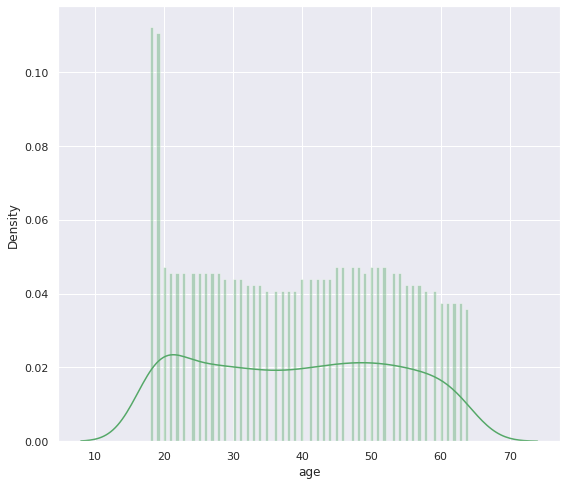

In [57]:
print(df.describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['age'], color='g', bins=100, hist_kws={'alpha': 0.4});

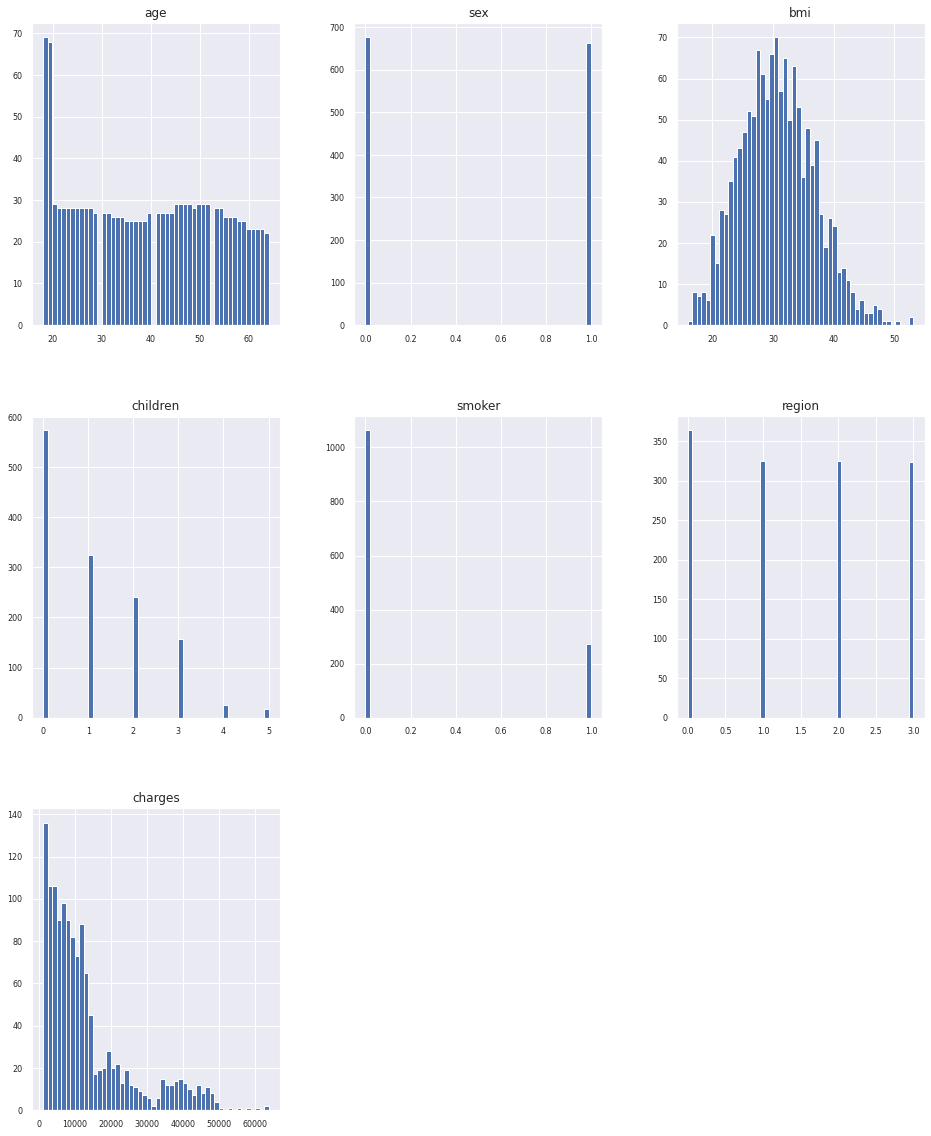

In [58]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 
#4 times as many non smokers as smokers
#regions are almost equally distributed with Southeast being slightly more
#age is nearly uniform distributed with a huge spike in 20 year olds
#bmi is normally distributed
#children and charges both decrease in distribution as they get bigger

In [62]:
df_corr = df.corr()['charges'][:-1] # -1 because the last row is charges
strong_corr_vars = df_corr[abs(df_corr) > 0.2].sort_values(ascending=False) #sorting for only strongly correlated variables to charges
print("There is {} strongly correlated values with insurance charges:\n{}".format(len(strong_corr_vars), strong_corr_vars))

#The only variable with over 50% correlation to the charges is the smoking variable
#age is the second highest correlation with 29.9% correlation 

There is 2 strongly correlated values with insurance charges:
smoker    0.787251
age       0.299008
Name: charges, dtype: float64


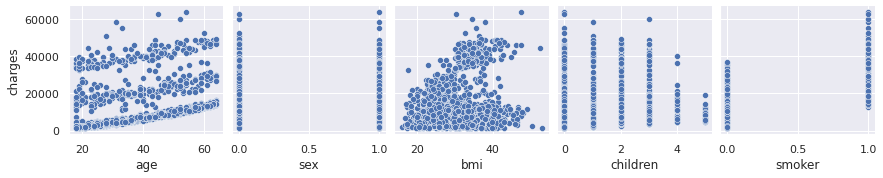

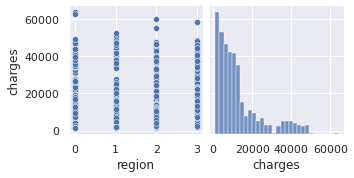

In [63]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['charges'])
    
    # age seams to have a linear correlation and bmi has a loose linear correlation
    

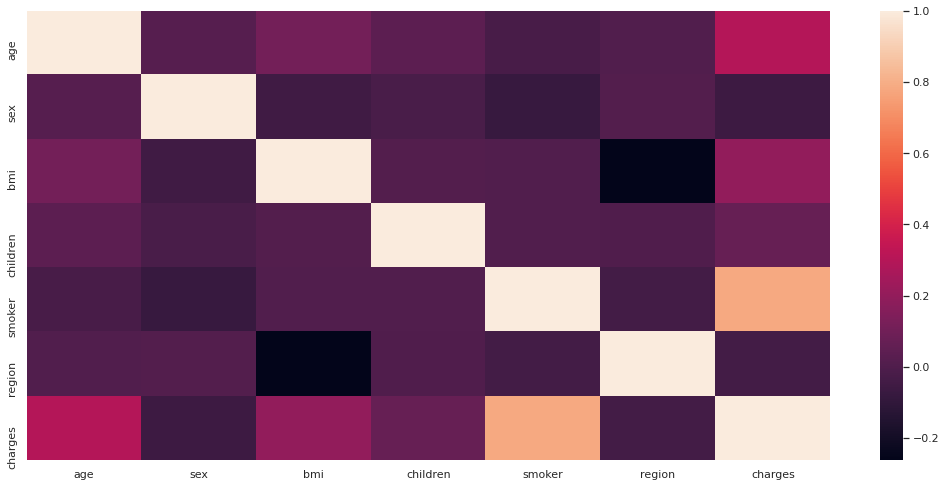

In [74]:
#lets review correlation of all the current attributes 
sc = df.corr()
sns.heatmap(sc)
#based on the heatmap, we can see some high correlations between assets, liabilities, and shareholder equity 
#as well as price high, dividend per share and ROE

In [67]:
# from sklearn.preprocessing import OneHotEncoder

# oe_style = OneHotEncoder()
# oe_results = oe_style.fit_transform(df[["region"]])
# pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_)

#could be worth transforming the region into 4 variables and having them be 0,1 but doesn't appear to have high correlation with charges

,0,1,2,3
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
1333,0.0,0.0,1.0,0.0
1334,0.0,0.0,0.0,1.0
1335,1.0,0.0,0.0,0.0
1336,0.0,1.0,0.0,0.0
